<a href="https://colab.research.google.com/github/NGUYEN-THI-HONG-NGOC-1005/AI/blob/main/Project_cu%E1%BB%91i_k%E1%BB%B3_nhaccuvietnam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install Pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from keras.utils import to_categorical
from keras.models import load_model
from keras.utils import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/project cuối kỳ/Train', target_size=(150,150), batch_size=32, class_mode='categorical')

Found 34 images belonging to 7 classes.


In [6]:
val_set = val_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/project cuối kỳ/Val', target_size=(150,150), batch_size=32, class_mode='categorical')

Found 4 images belonging to 7 classes.


In [7]:
training_set.class_indices

{'Sáo trúc': 0,
 "Đàn T'Rưng": 1,
 'Đàn bầu': 2,
 'Đàn nguyệt': 3,
 'Đàn nhị': 4,
 'Đàn tranh': 5,
 'Đàn tỳ  bà': 6}

In [8]:
val_set.class_indices

{'Sáo trúc': 0,
 "Đàn T'Rưng": 1,
 'Đàn bầu': 2,
 'Đàn nguyệt': 3,
 'Đàn nhị': 4,
 'Đàn tranh': 5,
 'Đàn tỳ bà': 6}

In [9]:
# Tạo ra mạng CNN để train mô hình
model=Sequential()

model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(7,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                    

In [10]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

history=model.fit(training_set,epochs=100,batch_size=128,verbose=1, validation_data=val_set, callbacks=[EarlyStopping(monitor='val_loss', patience=30)])

Epoch 1/100
2/2 [==============================] - 14s 3s/step - loss: 6.4484 - accuracy: 0.3529 - val_loss: 3.6091 - val_accuracy: 0.5000
Epoch 2/100
2/2 [==============================] - 1s 97ms/step - loss: 4.6918 - accuracy: 0.3235 - val_loss: 2.2447 - val_accuracy: 0.2500
Epoch 3/100
2/2 [==============================] - 1s 93ms/step - loss: 1.8359 - accuracy: 0.2059 - val_loss: 2.1362 - val_accuracy: 0.2500
Epoch 4/100
2/2 [==============================] - 1s 96ms/step - loss: 1.7938 - accuracy: 0.3235 - val_loss: 1.5526 - val_accuracy: 0.2500
Epoch 5/100
2/2 [==============================] - 1s 690ms/step - loss: 1.6379 - accuracy: 0.3235 - val_loss: 1.4320 - val_accuracy: 0.2500
Epoch 6/100
2/2 [==============================] - 1s 102ms/step - loss: 1.6211 - accuracy: 0.4118 - val_loss: 1.6176 - val_accuracy: 0.2500
Epoch 7/100
2/2 [==============================] - 1s 148ms/step - loss: 1.5131 - accuracy: 0.3824 - val_loss: 1.7984 - val_accuracy: 0.2500
Epoch 8/100
2/2 [=

In [11]:
Score=model.evaluate(training_set,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.7084813714027405
Train Accuracy 0.9117646813392639


<function matplotlib.pyplot.show(*args, **kw)>

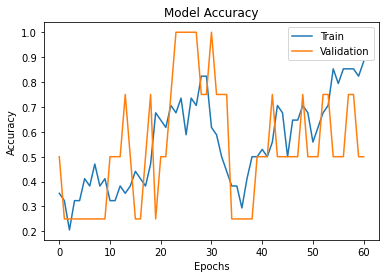

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

In [13]:
# Lưu lại
model.save("/content/drive/MyDrive/Colab Notebooks/project cuối kỳ/phathiencacloainhaccucotruyenVN.h5")

In [14]:
model_nhaccu=load_model('/content/drive/MyDrive/Colab Notebooks/project cuối kỳ/phathiencacloainhaccucotruyenVN.h5')

1/1 [==============================] - 0s 17ms/step
Đây là nhạc cụ : Đàn tranh


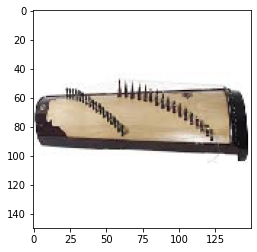

In [17]:
img = load_img('/content/drive/MyDrive/Colab Notebooks/project cuối kỳ/Test/tải xuống (8).jfif',target_size = (150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_nhaccu.predict(img)
class_nhaccu=['Sáo trúc',"Đàn T'Rưng",'Đàn bầu','Đàn nguyệt','Đàn nhị','Đàn tranh','Đàn tỳ bà']
a= int(np.argmax(model.predict(img),axis=1))
print("Đây là nhạc cụ :", class_nhaccu[a])

In [ ]:
#Tạo giao diện trong python
import sys
from tkinter import *
from PIL import ImageTk, Image
import tkinter as tk
from tkinter import filedialog , ttk
import cv2
from threading import Thread
import numpy as np
import os
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
root = tk.Tk()
root.geometry('600x700')
root.title("CÁC LOẠI NHẠC CỤ CỔ TRUYỀN VIỆT NAM")
class ImageConverter(tk.Frame):
    def __init__(self, root):
        super().__init__(root)
        self.init_ui()
    def init_ui(self):
       self.pack()
       self.lable = tk.Label(self, text='CÁC LOẠI NHẠC CỤ CỔ TRUYỀN VIỆT NAM', font= 'arial 20', bg="green", fg= "white")
       self.lable.pack()
       self.openbtn = tk.Button(self, text='Select image',fg = "black", bg="white",font= 'arial 14', command=self.open_image)
       self.openbtn.pack()
       #self.imageframe= tk.LabelFrame(self, text=' Image view')
       #self.imageframe.pack()
       self.lableimage= tk.Label(self,width=100,height=27)
       self.lableimage.pack()
       self.run1 = tk.Button(self, text='SEARCH',fg = "white", bg="dodgerblue",font= 'arial 14',command=self.nhandien)
       self.run1.pack()
       self.openbtn1 = tk.Button(self, text='DELETE',fg = "yellow", bg="gray",font= 'arial 14', command=self.clear)
       self.openbtn1.pack()        
    def nhandien(self):
        model = load_model('D:/AI/NHẠC CỤ/phathiencacloainhaccucotruyenVN.h5')
        img5 = load_img(self.filemane,target_size=(150,150))
        plt.imshow(img5)
        img5=img_to_array(img5)
        img5=img5.astype('float32')
        img5=img5/255
        img5=np.expand_dims(img5,axis=0)
        result=model.predict(img5)
        class_nhaccu=['Sáo trúc',"Đàn T'Rưng",'Đàn bầu','Đàn nguyệt','Đàn nhị','Đàn tranh','Đàn tỳ bà']
        a= int(np.argmax(model.predict(img5),axis=1))
        print("Đây là loại nhạc cụ:", class_nhaccu[a])
        self.lable2= tk.Label(self, text=class_nhaccu[a], bg="orange",fg='white',font= 'arial 14')
        self.lable2.pack()
    def clear(self):
        self.lable2.destroy()
    def open_image(self):
        self.filemane = filedialog.askopenfilename()
        self.img = Image.open(self.filemane)
        self.x =int(self.img.size[0])
        self.y =int(self.img.size[1])
        self.img2 =self.img.resize((self.x,self.y))
        self.imgtk= ImageTk.PhotoImage(self.img)
        self.lableimage.config(image=self.imgtk, width= 300, height= 400)        
gui = ImageConverter(root)
root.mainloop()